## PHYS 249 Assignment \#8:  Differential Equations and Simulations 

(See units 19-20 & 23-24)

### Problem 8.1: A 2D Simple Bouncing Ball

Consider a ball bouncing around a 2D rectangular box, with horizontal/vertical sides at $(x_0,x_1, y_0,y_1)$. 

**a)** To begin with, we will ignore gravtiy and any other forces, and assume that the ball simply moves at constant velocity without acceleration/deceleration, until it hits a wall. At that point, the velocity component normal to the wall is reversed, while the other component remains unchanged.

The code stub below sets up the problem and evolves the ball forward with time, but includes the condition for only one wall.

Add the conditions for the other walls, run the code and plot the motion of the ball.


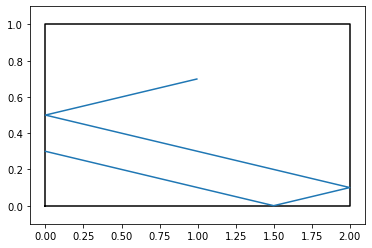

In [ ]:
# import stuff
from numpy import array, arange
from pylab import plot, show, xlim, ylim

#note we will assume S.I. units - meters, seconds etc. - for all quantities

# define evolution equations
def deriv(P):
    x = P[0]
    y = P[1]
    vx = P[2]
    vy = P[3]
    ax = 0.0
    ay = 0.0
    return array([vx,vy,ax,ay],float)

# setup integration time and time resolution
t0 = 0.0
t1 = 10
N = 1000
dt = (t1-t0)/float(N)
tpoints = arange(t0,t1,dt)


# set up boundary conditions
# walls at x0, x1, y0, y1
x0 = 0.0
x1 = 2.0
y0 = 0.0
y1 = 1.0

# set up intial conditions
p = array([0.0, 0.3, 0.5, -0.1],float)

xpoints = []
ypoints = []

# iterate through steps
# using Euler integration
for t in tpoints:
        xpoints.append(p[0])
        ypoints.append(p[1])
        p += dt*deriv(p)
        # reflect off walls
        ######### add the other conditions here #######
        if p[0] < x0:
            p[0] = 2.0*x0 - p[0]
            p[2] = - p[2]
            
        if p[1] < y0:
            p[1] = y0 - p[1]
            p[3] = -p[3]
            
        if p[0] > x1:
            p[0] = 2.0*x1 - p[0]
            p[2] = -p[2]
            
        if p[1] > y1:
            p[1] = 2*y1 - p[1]
            p[3] = -p[3]        
            
            
# show results - draw box
xlim(x0-0.1,x1+0.1)
ylim(y0-0.1,y1+0.1)
boxx = [x0,x1,x1,x0,x0]
boxy = [y0,y0,y1,y1,y0]
plot(boxx,boxy, 'k-')
# now draw path and show it

plot(xpoints, ypoints)



**b)** Now add acceleration due to gravity, with the usual gravitational constant g = 9.81 downwards. The motion should become more realistic.


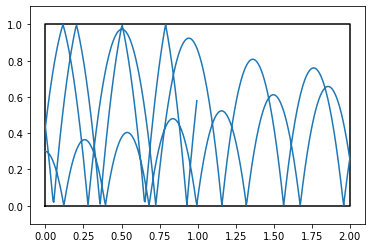

In [170]:
# import stuff
from numpy import array, arange
from pylab import plot, show, xlim, ylim

#note we will assume S.I. units - meters, seconds etc. - for all quantities

# define evolution equations
def deriv(P):
    x = P[0]
    y = P[1]
    vx = P[2]
    vy = P[3]
    ax = 0.0
    ay = -9.81
    return array([vx,vy,ax,ay],float)

# setup integration time and time resolution
t0 = 0.0
t1 = 10
N = 1000
dt = (t1-t0)/float(N)
tpoints = arange(t0,t1,dt)

# set up boundary conditions
# walls at x0, x1, y0, y1
x0 = 0.0
x1 = 2.0
y0 = 0.0
y1 = 1.0

# set up intial conditions
p = array([0.0, 0.3, 0.5, -0.1],float)

xpoints = []
ypoints = []

# iterate through steps
# using Euler integration
for t in tpoints:
        xpoints.append(p[0])
        ypoints.append(p[1])
        p += dt*deriv(p)
        # reflect off walls
        ######### add the other conditions here #######
        if p[0] < x0:
            p[0] = 2.0*x0 - p[0]
            p[2] = - p[2]
            
        if p[1] < y0:
            p[1] = y0 - p[1]
            p[3] = -p[3]
            
        if p[0] > x1:
            p[0] = 2.0*x1 - p[0]
            p[2] = -p[2]
            
        if p[1] > y1:
            p[1] = 2*y1 - p[1]
            p[3] = -p[3]        
            
            
# show results - draw box
xlim(x0-0.1,x1+0.1)
ylim(y0-0.1,y1+0.1)
boxx = [x0,x1,x1,x0,x0]
boxy = [y0,y0,y1,y1,y0]
plot(boxx,boxy, 'k-')
# now draw path and show it

plot(xpoints, ypoints)



**c)** Now make a second version of the code that uses RK4 integration rather than Euler. 

The lines of code for RK4 might look something like:

        k1 = dt*deriv(p, t)
        k2 = dt*deriv(p + 0.5*k1,t+0.5*dt)
        k3 = dt*deriv(p + 0.5*k2,t+0.5*dt)
        k4 = dt*deriv(p + k3,t+dt)
        p += (k1+2*k2+2*k3+k4)/6.0

Run the Euler code and the RK4 code, check energy conservation for the two by plotting versus time the total energy per unit mass:

$$E/m = P/m + K/m = yg + \frac{1}{2} v^2$$. 

Adjust the number of timesteps until energy is conserved to 10\%\ from $t = 0$ to $t = 10$.


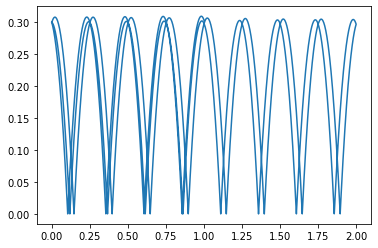

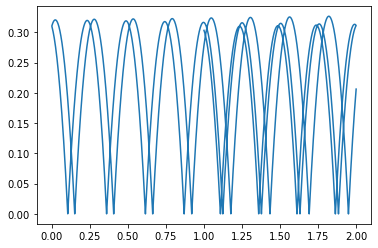

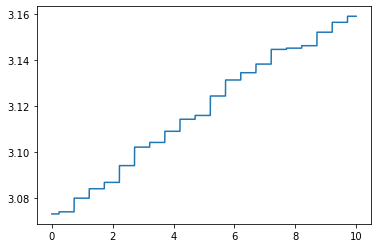

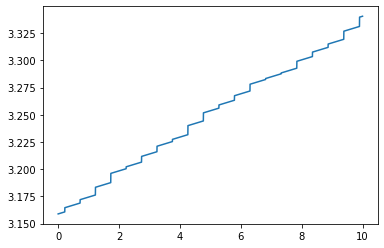

3.073
3.158899454579068
3.3405478326807616


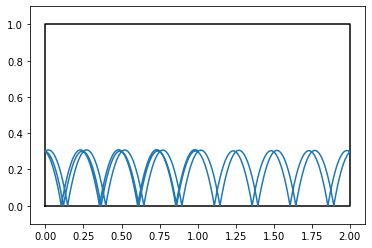

In [171]:
# import stuff
from numpy import array, arange, sqrt
from pylab import plot, show, xlim, ylim

#note we will assume S.I. units - meters, seconds etc. - for all quantities

# define evolution equations
def deriv(P, t):
    x = P[0]
    y = P[1]
    vx = P[2]
    vy = P[3]
    ax = 0.0
    ay = -9.81
    return array([vx,vy,ax,ay],float)

# setup integration time and time resolution
t0 = 0.0
t1 = 10
N = 56500
dt = (t1-t0)/float(N)
tpoints = arange(t0,t1,dt)

# set up boundary conditions
# walls at x0, x1, y0, y1
x0 = 0.0
x1 = 2.0
y0 = 0.0
y1 = 1.0

# set up intial conditions
p = array([0.0, 0.3, 0.5, -0.1],float)

xpoints = []
ypoints = []

# iterate through steps
# using RK-4 integration
newy = []
g = 9.81
for t in tpoints:
        xpoints.append(p[0])
        ypoints.append(p[1])
        k1 = dt*deriv(p, t)
        k2 = dt*deriv(p + 0.5*k1,t+0.5*dt)
        k3 = dt*deriv(p + 0.5*k2,t+0.5*dt)
        k4 = dt*deriv(p + k3,t+dt)
        
        v = sqrt(p[2]**2 + p[3]**2)
        newy.append(p[1]*g + ((v*v)/2))

        p += (k1+2*k2+2*k3+k4)/6.0
        if p[0] < x0:
            p[0] = 2.0*x0 - p[0]
            p[2] = - p[2]
            
        if p[1] < y0:
            p[1] = y0 - p[1]
            p[3] = -p[3]
            
        if p[0] > x1:
            p[0] = 2.0*x1 - p[0]
            p[2] = -p[2]
            
        if p[1] > y1:
            p[1] = 2*y1 - p[1]
            p[3] = -p[3]
        
x2points = []
y2points = []
newy2 = []


# iterate through steps
# using Euler integration
for t in tpoints:
        x2points.append(p[0])
        y2points.append(p[1])
        v = sqrt(p[2]**2 + p[3]**2)
        newy2.append(p[1]*g + ((v*v)/2))
        p += dt*deriv(p, 2)
        if p[0] < x0:
            p[0] = 2.0*x0 - p[0]
            p[2] = - p[2]
            
        if p[1] < y0:
            p[1] = y0 - p[1]
            p[3] = -p[3]
            
        if p[0] > x1:
            p[0] = 2.0*x1 - p[0]
            p[2] = -p[2]
            
        if p[1] > y1:
            p[1] = 2*y1 - p[1]
            p[3] = -p[3]        
#RK4
plot(xpoints, ypoints)
show()
#EULER
plot(x2points, y2points)
show()
#RK4
plot(tpoints, newy)
show()
#EULER
plot(tpoints, newy2)
show()
# show results - draw box
xlim(x0-0.1,x1+0.1)
ylim(y0-0.1,y1+0.1)
boxx = [x0,x1,x1,x0,x0]
boxy = [y0,y0,y1,y1,y0]
plot(boxx,boxy, 'k-')
# now draw path and show it

#initial energy of the system is E(y0, t0). To calcualte this we use initial position of the ball:
#Since it has already been calculated, we print the first index of our energy funciton.
print(newy[0])

#To conserve the system within 10% energy we need energy < 1.1* 3.073 --> energy < 3.3803. Now we find the N value that
#satisifies this until t = 10. We can check the max energy of the system at t = 10 by printing the [-1] index of the list

#RK4
print(newy[-1])


#We can see here the system is conserved to 10% at N = 15749.5 for RK4 integration

#EULER
print(newy2[-1])

#We can see here the system is conserved to about 10% at N = 56560 for EULER integration. It was harder to find a conservation
#of 10% using Euler.


plot(xpoints, ypoints)



**d)** Finally, add realistic enery dissipation to the code, assuming that the norm of the velocity is reduced by 5\%\ at each bounce.


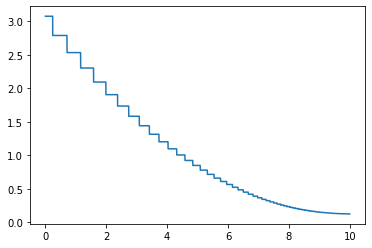

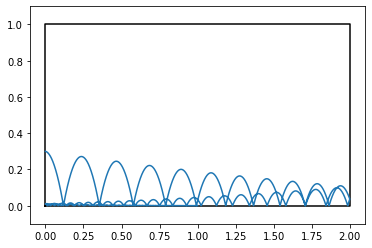

In [172]:
# import stuff
from numpy import array, arange, sqrt
from pylab import plot, show, xlim, ylim

#note we will assume S.I. units - meters, seconds etc. - for all quantities

# define evolution equations
def deriv(P, t):
    x = P[0]
    y = P[1]
    vx = P[2]
    vy = P[3]
    ax = 0.0
    ay = -9.81
    return array([vx,vy,ax,ay],float)

# setup integration time and time resolution
t0 = 0.0
t1 = 10
N = 56500
dt = (t1-t0)/float(N)
tpoints = arange(t0,t1,dt)

# set up boundary conditions
# walls at x0, x1, y0, y1
x0 = 0.0
x1 = 2.0
y0 = 0.0
y1 = 1.0

# set up intial conditions
p = array([0.0, 0.3, 0.5, -0.1],float)

xpoints = []
ypoints = []

# iterate through steps
# using RK-4 integration
newy = []
g = 9.81
for t in tpoints:
        xpoints.append(p[0])
        ypoints.append(p[1])
        k1 = dt*deriv(p, t)
        k2 = dt*deriv(p + 0.5*k1,t+0.5*dt)
        k3 = dt*deriv(p + 0.5*k2,t+0.5*dt)
        k4 = dt*deriv(p + k3,t+dt)
        
        v = sqrt(p[2]**2 + p[3]**2)
        newy.append(p[1]*g + ((v*v)/2))

        p += (k1+2*k2+2*k3+k4)/6.0
        if p[0] < x0:
            p[0] = 2.0*x0 - p[0]
            p[2] = - p[2]
            
        if p[1] < y0:
            p[1] = y0 - p[1]
            p[3] = -p[3] + 0.05*p[3]
            
        if p[0] > x1:
            p[0] = 2.0*x1 - p[0]
            p[2] = -p[2]
            
        if p[1] > y1:
            p[1] = 2*y1 - p[1]
            p[3] = -p[3]    
                
#RK4
plot(tpoints, newy)
show()

# show results - draw box
xlim(x0-0.1,x1+0.1)
ylim(y0-0.1,y1+0.1)
boxx = [x0,x1,x1,x0,x0]
boxy = [y0,y0,y1,y1,y0]
plot(boxx,boxy, 'k-')
# now draw path and show it


plot(xpoints, ypoints)



### Problem 8.2: A 1D Elastic Bouncing Ball

**a)** Now consider the motion of a hard ball of mass $m$, with a finite radius $r$. For simplicity, we will suppose it is in a tall thin box with a bottom but no top, and that it bounces straight up and down, so the motion is 1D. 

Modify the code above to track the height of the ball $z$ versus time, taking into account gravity, but ignoring any dissipation. Note the ball bounces when its *bottom* side touches the ground, i.e. when its centre is a distance $r$ above the ground; you can decide whether you want to track the centre of the ball or the bottom in your code.

Plot the motion $z(t)$.



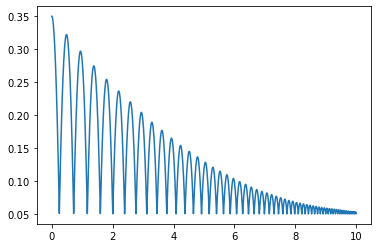

In [165]:
# import stuff
from numpy import array, arange, sqrt
from pylab import plot, show, xlim, ylim

#note we will assume S.I. units - meters, seconds etc. - for all quantities

m = 0.3
r = 0.05

# define evolution equations
def deriv(P, t):
    x = P[0]
    y = P[1]
    vx = P[2]
    vy = P[3]
    ax = 0.0
    ay = -9.81
    return array([vx,vy,ax,ay],float)

x0 = 0.0
x1 = 2.0
y0 = 0.0
y1 = 1.0

# setup integration time and time resolution
t0 = 0.0
t1 = 10
N = 15749.5
dt = (t1-t0)/float(N)
tpoints = arange(t0,t1,dt)

# set up intial conditions
p = array([0.0, 0.3, 0, 0],float)

ypoints = []

# iterate through steps
# using RK-4 integration
g = 9.81
for t in tpoints:
        ypoints.append(p[1]+r)
        k1 = dt*deriv(p, t)
        k2 = dt*deriv(p + 0.5*k1,t+0.5*dt)
        k3 = dt*deriv(p + 0.5*k2,t+0.5*dt)
        k4 = dt*deriv(p + k3,t+dt)

        p += (k1+2*k2+2*k3+k4)/6.0
        
        if p[1] < y0:
            p[1] = y0 - p[1]
            p[3] = -p[3] + 0.05*p[3]
        

plot(tpoints, ypoints)



**b)** Modify the code from part **a** to model an elastic bounce. Suppose that if the centre of the ball  reaches height $z < r$, this means the ball is compressed by a relative factor $X = r/z$. We can suppose the ball feels an elastic force like the force on a compressed spring, $F_{\rm el} = k(r-z)$, that slows it down and pushes it upwards. .

Given a choice of mass and radius for the ball (e.g. $m = 1kg, r = 0.3m$), see if you can adjust the spring constant $k$ and the timestep $dt$, so as to get the ball to bounce "naturally", i.e. without putting in any explicit rule about the velocity changing direction when it hits the ground.

As before, plot the motion $z(t)$.

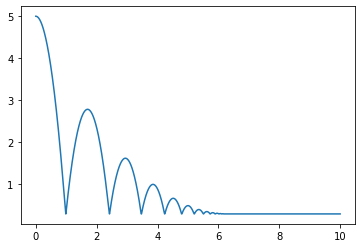

In [1]:
# import stuff
from numpy import array, arange, sqrt
from pylab import plot, show, xlim, ylim

#note we will assume S.I. units - meters, seconds etc. - for all quantities

m = 1
r = 0.3

# define evolution equations
def deriv(P, t):
    x = P[0]
    y = P[1]
    vx = P[2]
    vy = P[3]
    ax = 0.0
    ay = -9.81
    
    if P[1] < r:
        ay = -9.81 + (k*(r-P[1]))/m
        vy = P[3] + ay*dt
    return array([vx,vy,ax,ay],float)

x0 = 0.0
x1 = 2.0
y0 = 0.0
y1 = 1.0

# setup integration time and time resolution
t0 = 0.0
t1 = 10
N = 15749.5
dt = (t1-t0)/float(N)
tpoints = arange(t0,t1,dt)

# set up intial conditions
p = array([0.0, 5, 0, 0],float)

ypoints = []

# iterate through steps
# using RK-4 integration
g = 9.81
comp = r/p[1]
k = 100000
for t in range(len(tpoints)):
    
    if p[1] < r:
        ypoints.append(r) #comp * p[1] = r, compression of the ball
    else:
        ypoints.append(p[1]) 
        
        
    k1 = dt*deriv(p, t)
    k2 = dt*deriv(p + 0.5*k1,t+0.5*dt)
    k3 = dt*deriv(p + 0.5*k2,t+0.5*dt)
    k4 = dt*deriv(p + k3,t+dt)

    p += (k1+2*k2+2*k3+k4)/6.0
        
    if p[1] < y0:
            p[1] = y0 - p[1]
            p[3] = -p[3]
        
            

plot(tpoints, ypoints)

